# MIOwAD NN1 🍻

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Architecture

In [3]:
class NeuralNetwork():
    def __init__(self, layers):
        """
        layers: list of integers, number of neurons in each layer (e.g. [2, 3, 1] for 2 input neurons, 3 neurons in the hidden layer, and 1 output neuron)
        This defines the necessary dimensions for the weight matrices and bias vectors.      
    """
        self.layers = layers
        self.weights = []
        self.biases = []

    def set_weights(self, weights, biases):
        self.weights = weights
        self.biases = biases

    def generate_random_weights(self, weight_range=(-1, 1)):
        w_min, w_max = weight_range
        weights = []
        biases = []
        for i in range(len(self.layers)- 1):
            weight_matrix = np.random.uniform(w_min, w_max, (self.layers[i], self.layers[i+1]))
            bias_vector = np.random.uniform(w_min, w_max, (1, self.layers[i+1]))
            weights.append(weight_matrix)
            biases.append(bias_vector)

        return weights, biases

    def activation(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def forward(self, x):
        a = x
        index = 0
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w) + b
            if index < len(self.weights) - 1:
                a = self.activation(z)
            else:
                a = z
            index += 1
        return a

    def predict(self, x):
        y_pred = self.forward(x)
        return y_pred
    
    def print_weights(self):
        print("Weights: ", self.weights)
        print("Biases: ", self.biases)


### Visualization of step-large dataset

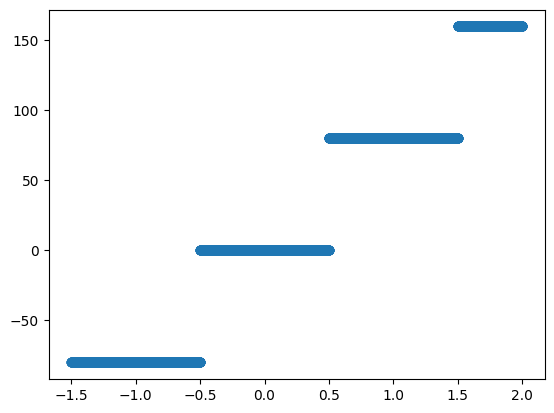

In [4]:
step_data_train = pd.read_csv('steps-large-training.csv')
X_step_train = step_data_train['x'].values.reshape(-1, 1)
y_step_train = step_data_train['y'].values.reshape(-1, 1)
plt.scatter(X_step_train, y_step_train)

### Neural Network with 1 hidden layer with 5 neurons

The weights were chosen in such a way that each successive interval has more active neurons, starting with no active neurons in the interval (-1.5, -0.5).

MSE for train data:  0.022223735468825244
MSE for test data:  0.0


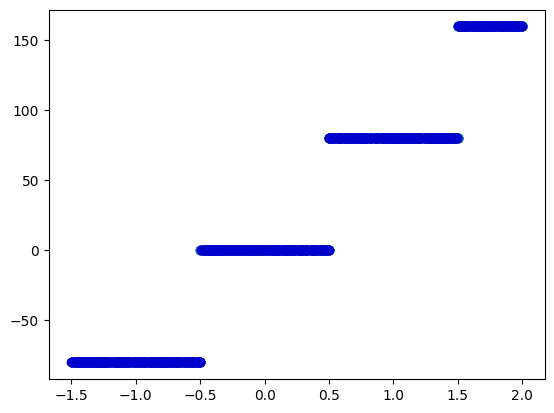

In [5]:
step_data_test = pd.read_csv('steps-large-test.csv')
X_step_test = step_data_test['x'].values.reshape(-1, 1)
y_step_test = step_data_test['y'].values.reshape(-1, 1)

nn = NeuralNetwork([1, 5, 1])

weights = [np.array([[1e6,1e6,1e6,0,0]]), np.array([[80], [80], [80], [0], [0]])]
biases = [np.array([[0.5e6,-0.5e6,-1.5e6,0,0]]), np.array([-80])]

nn.set_weights(weights, biases)
y_pred_step_train = nn.predict(X_step_train)
y_pred_step_test = nn.predict(X_step_test)
MSE_train = np.mean((y_step_train - y_pred_step_train) ** 2)
MSE_test = np.mean((y_step_test - y_pred_step_test) ** 2)
print("MSE for train data: ", MSE_train)
print("MSE for test data: ", MSE_test)

plt.scatter(X_step_train, y_step_train)
plt.scatter(X_step_test, y_pred_step_test, color='mediumblue')
plt.show()

### Neural Network with 2 hidden layers with 5 neurons each

MSE for train data:  0.022223735468825244
MSE for test data:  0.0


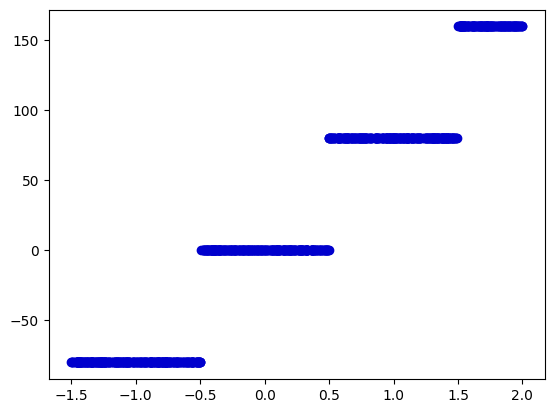

In [6]:
nn2 = NeuralNetwork([1, 5, 5, 1])

medium_layer_weights = np.array([[1e6,0,0,0,0], [0,1e6,0,0,0], [0,0,1e6,0,0], [0,0,0,0,0], [0,0,0,0,0]])
medium_layer_biases = np.array([[-0.5e6,-0.5e6,-0.5e6,0,0]])

weights2 = [np.array([[1e6,1e6,1e6,0,0]]), medium_layer_weights, np.array([[80], [80], [80], [0], [0]])]
biases2 = [np.array([[0.5e6,-0.5e6,-1.5e6,0,0]]),medium_layer_biases, np.array([-80])]

nn2.set_weights(weights2, biases2)
y_pred2_step_train = nn2.predict(X_step_train)
y_pred2_step_test = nn2.predict(X_step_test)
MSE2_train = np.mean((y_step_train - y_pred_step_train) ** 2)
MSE2_test = np.mean((y_step_test - y_pred_step_test) ** 2)
print("MSE for train data: ", MSE2_train)
print("MSE for test data: ", MSE2_test)

plt.scatter(X_step_test, y_pred2_step_test, color='mediumblue')
plt.show()

## Visualization of square-simple dataset

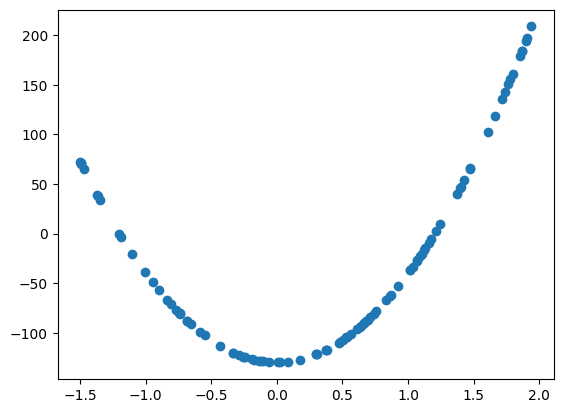

In [7]:
square_data_train = pd.read_csv('square-simple-training.csv')
X_square_train = square_data_train['x'].values.reshape(-1, 1)
y_square_train = square_data_train['y'].values.reshape(-1, 1)

square_data_test = pd.read_csv('square-simple-test.csv')
X_square_test = square_data_test['x'].values.reshape(-1, 1)
y_square_test = square_data_test['y'].values.reshape(-1, 1)

plt.scatter(X_square_train, y_square_train)

## Neural Network with 1 hidden layer and 10 neurons

The adjustment of weight and bias values was first focused on achieving a good fit for values around the vertex of the quadratic function, followed by fine-tuning the values for more distant points, which are easier to isolate by activating specific neurons only from a certain value onwards.

MSE for train data:  5.486858169020682
MSE for test data:  4.9760858831988335


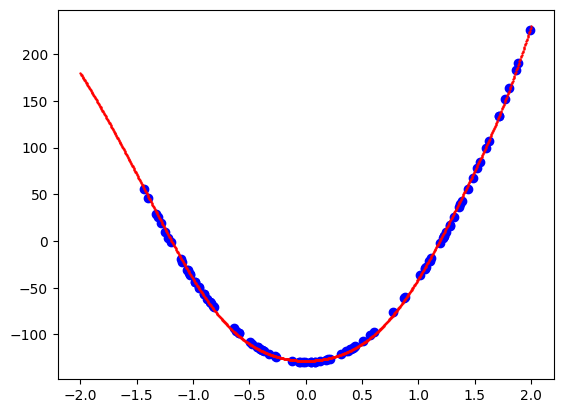

In [8]:
nn_square = NeuralNetwork([1, 10, 1])
scale = 0.95
square_weights = [scale * np.array([[3.4,2.5,2.4,1.9,7,0,-1.9,-2.4,-2.5,-3.4]]), np.array([[150],[150],[150],[100],[100],[0],[100],[150],[150],[150]])]
square_biases = [np.array([[-3.5,-4,-4.5,-6.8,-13.3,0,-6.8,-4.5,-4,-3.5]]), np.array([-146])]


nn_square.set_weights(square_weights, square_biases)
y_pred_square_train = nn_square.predict(X_square_train)
y_pred_square_test = nn_square.predict(X_square_test)
MSE_square_train = np.mean((y_square_train - y_pred_square_train) ** 2)
MSE_square_test = np.mean((y_square_test - y_pred_square_test) ** 2)
print("MSE for train data: ", MSE_square_train)
print("MSE for test data: ", MSE_square_test)


x = np.linspace(-2, 2, 1000)
y_pred = nn_square.predict(x.reshape(-1, 1))

plt.scatter(X_square_test, y_square_test, color='blue')
plt.scatter(x, y_pred, color='red', s=0.5)
plt.show()
